In [152]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
filenames=os.listdir('../firefly-inverse-data/data/nonfix')
result_log_set=[]
for filename in filenames:
    try:
        result_log_set.append(torch.load('../firefly-inverse-data/data/nonfix/'+filename))
    except:
        print(filename)


In [161]:
filenames

['20191231-185016-01061745EP200.1sample50IT60_LR_parttheta_result.pkl',
 '20191231-185016EP200.1sample2IT1_LR_parttheta_result.pkl',
 '20191231-185016EP200.1sample50IT60_LR_parttheta_result.pkl',
 '20200301-121927EP200.1sample2IT1_LR_parttheta_result.pkl',
 '20200301-121927EP500.1sample2IT1_LR_parttheta_result.pkl',
 'all non fix low noise rangeEP5000.1sample2IT50_LR_parttheta_result.pkl',
 'all non fix low noiseEP5000.1sample2IT50_LR_parttheta_result.pkl',
 'all non fix med noise rangeEP5000.1sample2IT50_LR_parttheta_result.pkl',
 'all non fix very low noiseEP5000.1sample2IT50_LR_parttheta_result.pkl',
 'all non fixEP5000.1sample2IT50_LR_parttheta_result.pkl',
 'obj teacher new noise 200x100EP2000.1sample2IT100_LR_parttheta_result.pkl',
 'random longrunEP5000.1sample2IT500_LR_parttheta_result.pkl',
 'small batch long runEP100.1sample2IT500_LR_parttheta_result.pkl',
 'small batch longer runEP100.1sample2IT5000_LR_parttheta_result.pkl',
 'small batch longer runEP2000.1sample2IT200_LR_pa

14


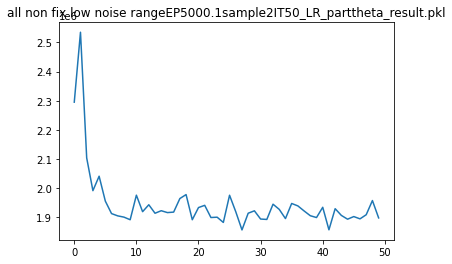

In [112]:
index=9
result_log= result_log_set[index][0]
print(len(result_log))
filename=filenames[index]
plt.figure()
plt.title(filename)
plt.plot(result_log['loss_log'])

Text(0.5, 1.0, 'process gain velocity')

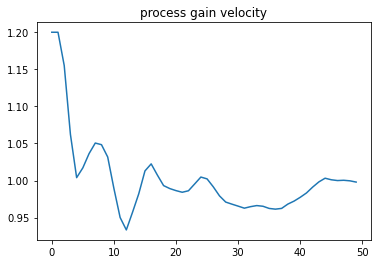

In [114]:
theta_log=[]
for i in range(len(result_log['theta_log'])):
    theta_log.append(result_log['theta_log'][i][0])
plt.figure()
plt.plot(theta_log)
plt.title('process gain velocity')

Text(0.5, 1.0, 'proces gain angular velocity')

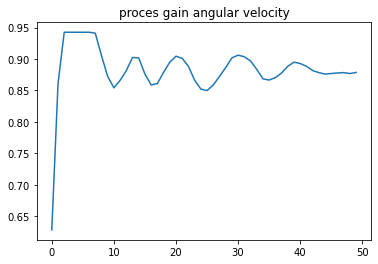

In [115]:
theta_log=[]
for i in range(len(result_log['theta_log'])):
    theta_log.append(result_log['theta_log'][i][1])
plt.figure()
plt.plot(theta_log)
plt.title('proces gain angular velocity')

Text(0.5, 1.0, 'observation gain velocity')

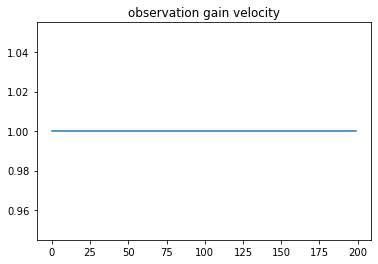

In [74]:
theta_log=[]
for i in range(len(result_log['theta_log'])):
    theta_log.append(result_log['theta_log'][i][4])
plt.figure()
plt.plot(theta_log)
plt.title('observation gain velocity')

Text(0.5, 1.0, 'observation gain anglular velocity ')

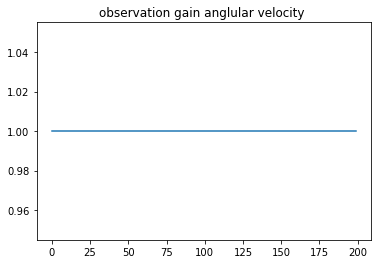

In [75]:
theta_log=[]
for i in range(len(result_log['theta_log'])):
    theta_log.append(result_log['theta_log'][i][5])
plt.figure()
plt.plot(theta_log)
plt.title('observation gain anglular velocity ')

Text(0.5, 1.0, 'goal radius')

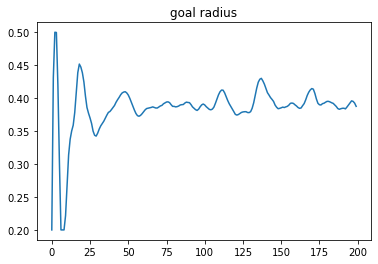

In [76]:
theta_log=[]
for i in range(len(result_log['theta_log'])):
    theta_log.append(result_log['theta_log'][i][8])
plt.figure()
plt.plot(theta_log)
plt.title('goal radius')

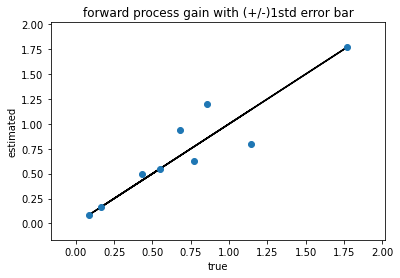

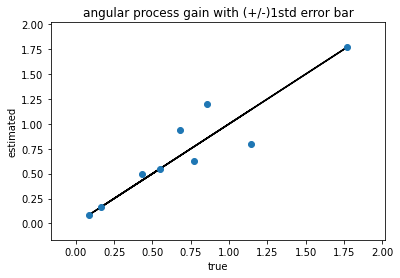

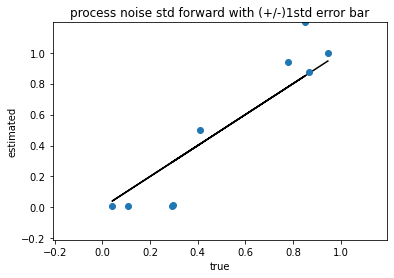

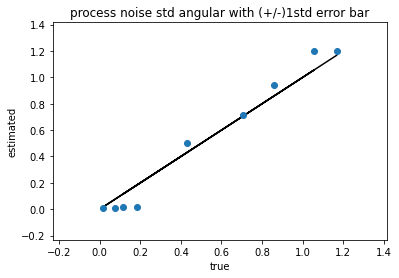

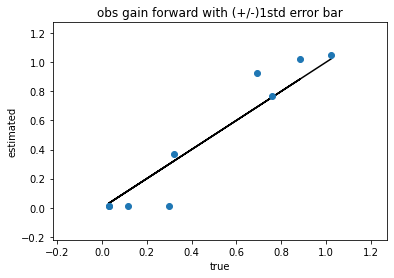

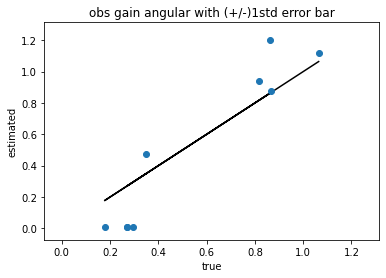

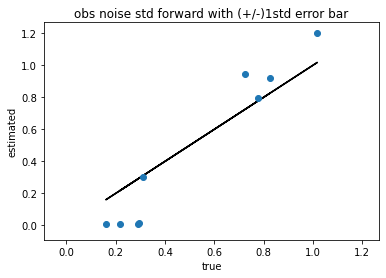

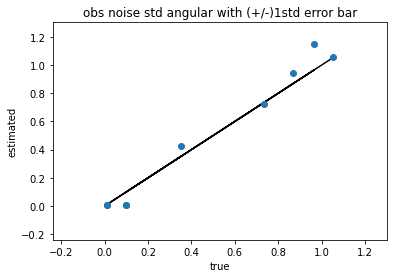

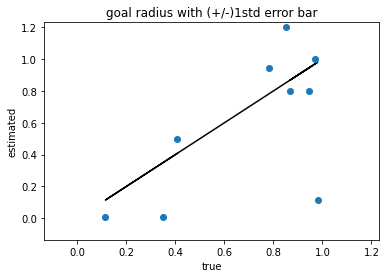

In [160]:
def mplotter(x, y, yerr, title = None, xlabel=None, ylabel=None):
    plt.figure()
    plt.errorbar(x, y, yerr , fmt='o')
    plt.plot(x, x, 'k-')
    
    if xlabel is not None:
        plt.xlabel(xlabel)
    else: plt.xlabel('true')
            
    if ylabel is not None:
        plt.ylabel(ylabel)
    else: plt.ylabel('estimated')
        
    if title is not None:
        plt.title(title)


true_theta=result_log['true_theta']

final_theta = []
true_theta = []
stderr = []

# for ttt in range(len(result_log_set)):
#     final_theta.append(result_log['theta'].data)
#     true_theta.append(result_log['true_theta'].data)
#     stderr.append(result_log['stderr'].data)
    
    
    
for result in result_log_set:
    for each_run in result:
        final_theta.append(each_run['theta'].data)
        true_theta.append(each_run['true_theta'].data)
        stderr.append(each_run['stderr'].data)

title_range = ['forward process gain', 'angular process gain', 'process noise std forward',
                          'process noise std angular', 'obs gain forward', 'obs gain angular', 'obs noise std forward',
                          'obs noise std angular', 'goal radius']
for i in range(9):
    mplotter(true_theta[i],final_theta[i], yerr =stderr[i] ,title = title_range[i]+' with (+/-)1std error bar')
    plt.xlim(true_theta[i].min()-0.25, true_theta[i].max()+0.25)
    plt.ylim(true_theta[i].min()-0.25, true_theta[i].max()+0.25)